In [1]:
!pip install pandas openpyxl
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 300.0/300.0 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from collections import Counter
import re
from wordcloud import WordCloud




In [3]:
# Se lee el excel
df_acciones = pd.read_excel('Acciones CA-FO-20 2022. 1.xlsx')

# Muestra las primeras filas del dataframe
df_acciones.head()


,ID,Hora de inicio Registro,Hora de finalización Registro,Correo electrónico,Nombre - Analista de Conexión,Fecha,Reporta,Tipo:,Area,Motivo,...,Acción,M- Causa (DEL ISHIKAWA),Actividades - Plan de acción,Fecha programada de cierre,Responsable de verificación de la implementación,Frecuencia de verificación de eficacia,Verificador de eficacia,seguimiento,Estado,Eficacia
0,1.0,2022-06-09 10:51:24,2022-06-09 10:54:47,jlopera@forjasbolivar.com,Jeiler Lopera Isaza,NaT,Jeiler Lopera Isaza,Correctiva,Almacenamiento,Indicador- Tarjetas amarillas,...,Actualmente se cuenta con un espacio fuera del...,NaN,"Establecer un control de las puntas, mediante ...",2022-09-20,Jeiler Lopera Isaza,Mensualmente,Líder del SIG,\nse monta la solicitud en la APP de Mantenimi...,Abierta,Vencida
1,3.0,2022-06-09 17:04:32,2022-06-09 17:22:39,jlopera@forjasbolivar.com,Jeiler Lopera Isaza,NaT,Jeiler Lopera Isaza,Correctiva,Almacenamiento,Indicador- Tarjetas amarillas,...,El almacenista no visualizo la ruta de dicha o...,NaN,"*se solicita al área de generación de OPS, que...",2022-06-09,Jeiler Lopera Isaza,Mensualmente,Líder del SIG,Cerrada con seguimiento en el indicador de Tar...,cerrada,Eficaz
2,4.0,2022-06-13 11:17:02,2022-06-13 11:58:57,jechavarria@forjasbolivar.com,Juan Guillermo Echavarría Cuesta,NaT,JUAN GUILLERMO ECHAVARRIA,Correctiva,Logística,Indicador,...,Se incumple indicador de cumplimiento de Impor...,NaN,Notificación oficial a los proveedores con la ...,2022-12-30,JUAN GUILLERMO ECHAVARRIA,MENSUAL,LAURA SERNA,13/01/2023: Se envia el correo al proveedor FU...,cerrada,Eficaz
3,5.0,2022-06-13 13:26:02,2022-06-13 15:02:14,jserna@forjasbolivar.com,John Elver Serna Arias,NaT,John Serna,Correctiva,Ingeniería,Indicador,...,Desarrollo de cotizaciones por especialidad y MO.,NaN,Validación en seguimiento e indicador,2022-07-11,John Serna,mensual,Eddy Lara,27/09/2022:Se genero la capacidad con dos Inge...,Cerrada,Eficaz
4,6.0,2022-08-12 10:41:12,2022-08-12 11:33:30,aloaiza@forjasbolivar.com,Angie Loaiza Osorio,NaT,ANGIE CRISTINA LOAIZA OSORIO,Correctiva,Planeación y Control,Indicador,...,No claridad en la capacidad de la planta.\nInc...,NaN,1. Verificación de la capacidad de la planta a...,2022-08-31,Oswaldo Tobón y Angie Loaiza,Mensualmente,Laura Serna,NaN,En proceso,NaN


In [4]:
# Número de columnas
num_columnas = df_acciones.shape[1]
print(f"Número de columnas: {num_columnas}")

# Nombres de las columnas
nombres_columnas = df_acciones.columns
print(f"Nombres de las columnas: {nombres_columnas}")

# Tipos de variable en cada columna
tipos_columnas = df_acciones.dtypes
print("Tipos de variable en cada columna:")
print(tipos_columnas)

Número de columnas: 27
Nombres de las columnas: Index(['ID', 'Hora de inicio Registro', 'Hora de finalización Registro',
       'Correo electrónico', 'Nombre - Analista de Conexión', 'Fecha',
       'Reporta', 'Tipo:', 'Area', 'Motivo', 'Situacion',
       ' FUENTE DEL PROBLEMA (ISHIKAWA)', '(5 POR QUÉ por qué 1)',
       '5 POR QUÉ por qué 2)', ' (5 POR QUÉ por qué 3)',
       '(5 POR QUÉ por qué 5)', 'RESUMEN 5 POR QUÉ?', 'Acción',
       'M- Causa (DEL ISHIKAWA) ', 'Actividades - Plan de acción',
       'Fecha programada de cierre',
       'Responsable de verificación de la implementación',
       'Frecuencia de verificación de eficacia', 'Verificador de eficacia',
       'seguimiento ', 'Estado ', 'Eficacia'],
      dtype='object')
Tipos de variable en cada columna:
ID                                                         float64
Hora de inicio Registro                                     object
Hora de finalización Registro                       datetime64[ns]
Correo electrónico

In [5]:
#observamos valores de la variable motivo
df_acciones['Motivo'].unique()

array(['Indicador- Tarjetas amarillas\xa0', 'Indicador', 'Mejora',
       'Reclamo', 'Auditoría Externa\xa0', 'Auditoría Interna\xa0', nan,
       'Desviación\xa0 Temporal\xa0'], dtype=object)

In [6]:
#filtrmos por reclamos
df_reclamo = df_acciones[df_acciones['Motivo'] == 'Reclamo']
df_reclamo.head()

,ID,Hora de inicio Registro,Hora de finalización Registro,Correo electrónico,Nombre - Analista de Conexión,Fecha,Reporta,Tipo:,Area,Motivo,...,Acción,M- Causa (DEL ISHIKAWA),Actividades - Plan de acción,Fecha programada de cierre,Responsable de verificación de la implementación,Frecuencia de verificación de eficacia,Verificador de eficacia,seguimiento,Estado,Eficacia
8,21.0,2022-08-31 11:14:46,2022-08-31 11:37:17,jserna@forjasbolivar.com,John Elver Serna Arias,NaT,John Serna,Correctiva,Ingeniería,Reclamo,...,No había necesidad de actualizar plano por que...,Metodo,Actualizar plano estándar para equipos Rex y F...,2022-09-02,Laura Serna,Única verificación,Laura Serna,Se realiza cambio en planos,Cerrada,Eficaz
9,22.0,2022-08-31 11:38:13,2022-08-31 11:50:44,jserna@forjasbolivar.com,John Elver Serna Arias,NaT,John Serna,Correctiva,Ingeniería,Reclamo,...,No diseño bajo estándar y no había rol oficial...,Mano de Obra,Establecer responsable o líder de diseño para ...,2022-08-31,Laura Serna,Única revisión,Laura Serna,Se genera rol de líder de diseño. Sebastián De...,Cerrada,Eficaz
10,23.0,2022-08-31 11:50:55,2022-08-31 12:14:19,jserna@forjasbolivar.com,John Elver Serna Arias,NaT,John Serna,Correctiva,Ingeniería,Reclamo,...,Se asume perfil según fotos.,Mano de Obra,Actualización de planos conforme al levantamie...,2022-08-31,Laura Serna,Única.,Laura Serna,"Enfasisis en la validaci´pon, no asumir, modif...",Cerrada,Eficaz
84,97.0,2022-11-21 12:19:31,2022-11-21 13:19:33,compras@forjasbolivar.com,Diana Cristina Velez Murillo,2022-11-21,Diana Vélez,Correctiva,Compras,Reclamo,...,Desde ingeniería se realizarán cambios de los ...,Metodo,1. Cambio de planos por parte de ingeniería\n2...,2022-11-30,Diana Vélez,Una Vez,Laura Serna,NaN,En proceso,NaN
98,111.0,2023-03-22 10:37:58,2023-03-22 11:32:03,jchaverra@forjasbolivar.com,Joan Estiven Chaverra Gaviria,2023-03-22,Joan Estiven Chaverra,Correctiva,Calidad producto,Reclamo,...,Se verifican las muestras enviadas por el clie...,Metodo,*Construir LUP para el control de los diámetro...,2023-03-31,Laura Serna,Laura Serna,Laura Serna,Se crea LUP y se realiza socializacion y form...,Cerrado,NaN


In [7]:
#observamos tamaño
df_reclamo.shape

(30, 27)

In [8]:
#vemos que contiene la varibale
df_reclamo['Situacion'].unique()

array(['Reclamacion del cliente Tecomán PD28091 - 22100, ítem Chumacera Nihard 3 7/16 OC 8400004736. Carcasa con desviación en perforaciones para la fijación. No instala en la estructura del equipo.',
       'GCC Permian PD 28039. El cangilón llega con una medida diferente a la solicitada por el cliente.\nLlega 16mm mas pequeño. Las medidas estaban bien pero en diferente parte.',
       'Holcim Acapulco PD 27891. Sprocket motriz y tensor. El sprockt presenta diferencia en el perfil suministrado por FB respecto al existente en el equipo del cliente.',
       'El cliente Tecomán reporta diferencias dimensionales en La chumacera Ni-Hard suministrada en el pedido 8400004736 / PSL 27947/28091 el cual no le está permitiendo el ensamble con el eje tensor del equipo.\n\nEl cliente Argos Surinam-Vensur expresa que la chumacera que le llego está defectuosa, envía fotos donde muestra las condiciones. Pedido PSL: 27928',
       'Se presenta reclamo del cliente grupo Luz y fuerza en el PD 29288 deb

In [9]:
# cuantas veces aparece la palabra cadena?
# Filtrar filas donde la columna 'Situacion' contiene la palabra 'cadena' (case-insensitive)
df_reclamo_cadena = df_reclamo[df_reclamo['Situacion'].str.contains('cadena', case=False, na=False)]

# Contar cuántos ID únicos hay en las filas filtradas
num_id_con_cadena = df_reclamo_cadena['ID'].nunique()

print(f"Número de ID únicos que contienen la palabra 'cadena': {num_id_con_cadena}")


Número de ID únicos que contienen la palabra 'cadena': 5


In [10]:
#verificamos para el plural "cadenas"

# Filtrar filas donde la columna 'Situacion' contiene la palabra 'cadenas' (case-insensitive)
df_reclamo_cadena = df_reclamo[df_reclamo['Situacion'].str.contains('cadenas', case=False, na=False)]

# Contar cuántos ID únicos hay en las filas filtradas
num_id_con_cadena = df_reclamo_cadena['ID'].nunique()

print(f"Número de ID únicos que contienen la palabra 'cadenas': {num_id_con_cadena}")

Número de ID únicos que contienen la palabra 'cadenas': 0


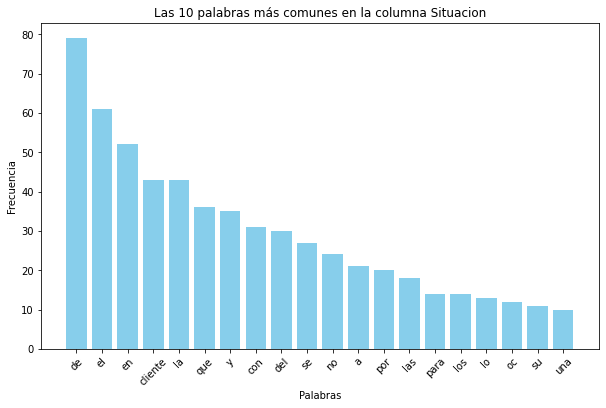

In [11]:

#verificamos cuantas veces aparece cada palabra para saber cual es el metodo de averia mas comun

# Función para limpiar y separar palabras
def limpiar_separar_palabras(texto):
    texto = texto.lower()  # Convertir a minúsculas
    palabras = re.findall(r'\b\w+\b', texto)  # Encontrar todas las palabras
    return palabras

# Unir todas las frases de la columna 'Situacion' en una sola cadena
todas_las_frases = ' '.join(df_reclamo['Situacion'].dropna().astype(str))

# Limpiar y separar las palabras
todas_las_palabras = limpiar_separar_palabras(todas_las_frases)

# Contar las palabras
contador_palabras = Counter(todas_las_palabras)

# Obtener las 10 palabras más comunes
palabras_comunes = contador_palabras.most_common(20)

# Separar las palabras y sus frecuencias
palabras, frecuencias = zip(*palabras_comunes)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias, color='skyblue')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Las 10 palabras más comunes en la columna Situacion')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Realizamos lo mismo del codigo anterior pero para un listado para facilitar el procesamiento

# Función para limpiar y separar palabras
def limpiar_separar_palabras(texto):
    texto = texto.lower()  # Convertir a minúsculas
    palabras = re.findall(r'\b\w+\b', texto)  # Encontrar todas las palabras
    return palabras

# Unir todas las frases de la columna 'Situacion' en una sola cadena
todas_las_frases = ' '.join(df_reclamo['Situacion'].dropna().astype(str))

# Limpiar y separar las palabras
todas_las_palabras = limpiar_separar_palabras(todas_las_frases)

# Contar las palabras
contador_palabras = Counter(todas_las_palabras)

# Obtener las palabras más comunes en orden descendente de frecuencia
palabras_comunes = contador_palabras.most_common()

# Imprimir el listado de palabras más comunes
print("Palabras más comunes en la columna Situacion:")
for palabra, frecuencia in palabras_comunes:
    print(f"{palabra}: {frecuencia}")


Palabras más comunes en la columna Situacion:
de: 79
el: 61
en: 52
cliente: 43
la: 43
que: 36
y: 35
con: 31
del: 30
se: 27
no: 24
a: 21
por: 20
las: 18
para: 14
los: 14
lo: 13
oc: 12
su: 11
una: 10
al: 10
pd: 9
un: 9
pedido: 8
cadena: 8
equipo: 7
detalle: 7
reclamación: 7
plano: 7
fabricación: 7
es: 7
planta: 7
pero: 6
parte: 6
presenta: 6
fb: 6
psl: 6
cual: 6
eje: 6
tuercas: 6
tornillos: 6
barras: 6
holcim: 5
cantidad: 5
unidades: 5
1: 5
ped: 5
están: 5
mm: 5
material: 5
según: 5
01: 5
24: 5
bien: 4
le: 4
fotos: 4
debido: 4
tornillo: 4
debajo: 4
colombia: 4
solicita: 4
cambio: 4
este: 4
tramos: 4
10: 4
tablillas: 4
tablilla: 4
francisco: 4
chumacera: 3
3: 3
16: 3
gcc: 3
llega: 3
diferente: 3
respecto: 3
reporta: 3
donde: 3
condiciones: 3
luz: 3
fuerza: 3
esta: 3
diaco: 3
novedad: 3
c: 3
tipo: 3
ensamblabilidad: 3
manifiesta: 3
tiene: 3
2: 3
revisión: 3
estrella: 3
20: 3
cemex: 3
hay: 3
error: 3
correo: 3
bolt: 3
8: 3
esparrago: 3
collar: 3
genera: 3
recibe: 3
llanes: 3
escaneo: 3
post

Para identificar las palabras que podrían ser componentes o fallas o partes de un sistema mecánico de arrastre se hace una inspección manual del anterior listado, teniendo en cuenta que el numero de elementos en el codigo anterior son contados por cuantas veces aparece la palabra, por lo tanto si aparece en un solo reporte X cantidad de veces la palabra se contará ese enumero de veces, en el siguiente codigo se agrupará solo por ID.

cadena: 8
equipo: 7
plano: 7
fabricacion: 7
parte: 6
eje: 6
tuercas:6
tornillos: 6
barras: 6
holcim: 5
tornillo: 4
Tramos: 4
Tablillas: 4
tablilla:
chumacera: 3
Fuerza: 3
Diaco: 3
Ensamblilidad: 3
Estrella: 3
Esparrago:
collar: 3
tecoman: 2
cangilon: 2
sprocket: 2
Motriz: 2
Tensor: 2
Rsoca: 2
Diametros: 2
Componentes: 2
rastras: 2
transportador: 2
espárragos: 2
ruedas:2
pintura:2
samalayuca:2
alabes: 2
lehigh: 2
caracasa: 1
Perforaciones: 1
sprockt: 1
surinam: 1
vensur: 1
expresa:1
vástago: 1
roscado: 1
agujeros: 1
sprockets: 1
transmisión: 1
canastillas: 1
ajuste: 1
alabeo: 1
desgaste:1
porosas:1

In [13]:
# Ahora si agrupamos cada palabra por ID para identificar en cuantos reportes aparece una palabra relacionada con fallas.

# Listado de palabras a buscar
palabras = [
    'cadena', 'equipo', 'plano', 'fabricación', 'parte', 'eje', 'tuercas',
    'tornillos', 'barras', 'holcim', 'tornillo', 'tramos', 'tablillas',
    'tablilla', 'chumacera', 'fuerza', 'diaco', 'estrella',
    'esparrago', 'collar', 'tecoman', 'cangilon', 'sprocket', 'motriz',
    'tensor', 'rosca', 'componentes', 'rastras', 'transportador',
    'ruedas', 'pintura', 'samalayuca', 'alabes', 'lehigh',
    'carcasa', 'perforaciones', 'sprockt', 'surinam', 'vensur', 'expresa',
    'roscado', 'agujeros', 'sprockets', 'transmisión',
    'canastillas', 'ajuste', 'alabeo', 'desgaste', 'porosas'
]

# Iterar sobre cada palabra del listado
for palabra in palabras:
    # Filtrar filas donde la columna 'Situacion' contiene la palabra (case-insensitive)
    df_filtrado = df_reclamo[df_reclamo['Situacion'].str.contains(palabra, case=False, na=False)]

    # Contar cuántos ID únicos hay en las filas filtradas
    num_id = df_filtrado['ID'].nunique()

    # Imprimir el resultado
    print(f"Número de ID únicos que contienen la palabra '{palabra}': {num_id}")

Número de ID únicos que contienen la palabra 'cadena': 5
Número de ID únicos que contienen la palabra 'equipo': 6
Número de ID únicos que contienen la palabra 'plano': 5
Número de ID únicos que contienen la palabra 'fabricación': 7
Número de ID únicos que contienen la palabra 'parte': 5
Número de ID únicos que contienen la palabra 'eje': 5
Número de ID únicos que contienen la palabra 'tuercas': 4
Número de ID únicos que contienen la palabra 'tornillos': 4
Número de ID únicos que contienen la palabra 'barras': 2
Número de ID únicos que contienen la palabra 'holcim': 3
Número de ID únicos que contienen la palabra 'tornillo': 8
Número de ID únicos que contienen la palabra 'tramos': 3
Número de ID únicos que contienen la palabra 'tablillas': 2
Número de ID únicos que contienen la palabra 'tablilla': 2
Número de ID únicos que contienen la palabra 'chumacera': 2
Número de ID únicos que contienen la palabra 'fuerza': 3
Número de ID únicos que contienen la palabra 'diaco': 3
Número de ID único

In [14]:
# Ahora se filtrará el listado solo para componentes.

# Ahora si agrupamos cada palabra por ID para identificar en cuantos reportes aparece una palabra relacionada con fallas.

# Listado de palabras a buscar
palabras2 = [
    'cadena', 'eje', 'tuercas','tornillos', 'barras', 'tornillo', 'tramos', 'tablillas',
    'tablilla', 'chumacera', 'fuerza','esparrago', 'cangilon', 'sprocket', 'motriz',
    'tensor', 'rosca', 'componentes', 'rastras', 'ruedas', 'alabes',
    'carcasa', 'sprockt', 'roscado', 'sprockets', 'transmisión', 'canastillas'
]

# Iterar sobre cada palabra del listado
for palabra in palabras2:
    # Filtrar filas donde la columna 'Situacion' contiene la palabra (case-insensitive)
    df_filtrado = df_reclamo[df_reclamo['Situacion'].str.contains(palabra, case=False, na=False)]

    # Contar cuántos ID únicos hay en las filas filtradas
    num_id = df_filtrado['ID'].nunique()

    # Imprimir el resultado
    print(f"Número de ID únicos que contienen la palabra '{palabra}': {num_id}")

Número de ID únicos que contienen la palabra 'cadena': 5
Número de ID únicos que contienen la palabra 'eje': 5
Número de ID únicos que contienen la palabra 'tuercas': 4
Número de ID únicos que contienen la palabra 'tornillos': 4
Número de ID únicos que contienen la palabra 'barras': 2
Número de ID únicos que contienen la palabra 'tornillo': 8
Número de ID únicos que contienen la palabra 'tramos': 3
Número de ID únicos que contienen la palabra 'tablillas': 2
Número de ID únicos que contienen la palabra 'tablilla': 2
Número de ID únicos que contienen la palabra 'chumacera': 2
Número de ID únicos que contienen la palabra 'fuerza': 3
Número de ID únicos que contienen la palabra 'esparrago': 2
Número de ID únicos que contienen la palabra 'cangilon': 1
Número de ID únicos que contienen la palabra 'sprocket': 3
Número de ID únicos que contienen la palabra 'motriz': 2
Número de ID únicos que contienen la palabra 'tensor': 2
Número de ID únicos que contienen la palabra 'rosca': 3
Número de ID ú

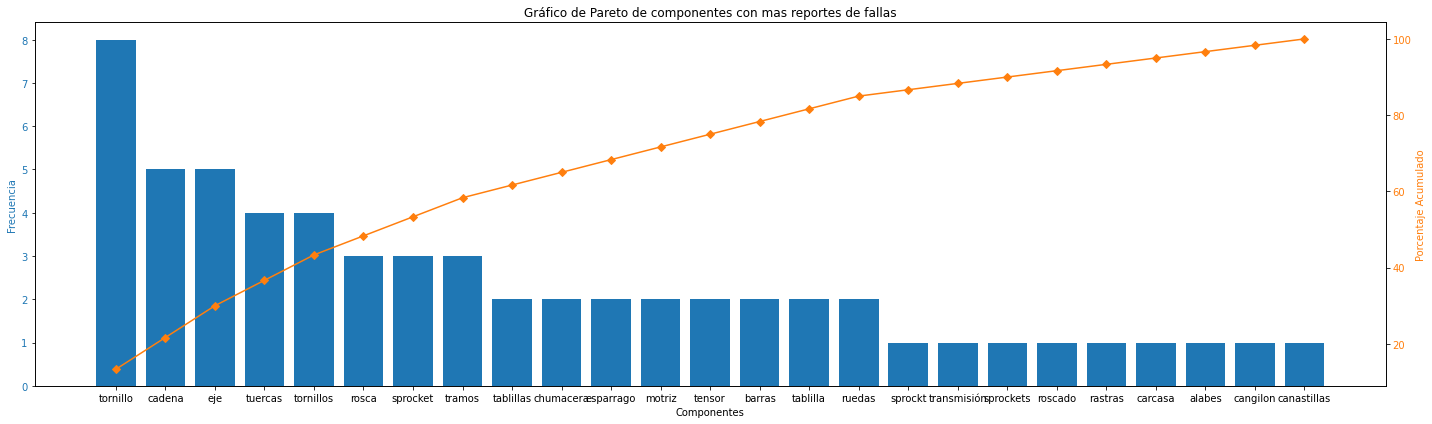

In [15]:
# ahora generamos el grafico de pareto

# Frecuencias generadas.
frecuencias = {
    'cadena': 5, 'eje': 5, 'tuercas': 4, 'tornillos': 4, 'barras': 2,
    'tornillo': 8, 'tramos': 3, 'tablillas': 2, 'tablilla': 2, 'chumacera': 2,
    'esparrago': 2, 'cangilon': 1, 'sprocket': 3, 'motriz': 2,
    'tensor': 2, 'rosca': 3, 'rastras': 1, 'ruedas': 2,
    'alabes': 1, 'carcasa': 1, 'sprockt': 1, 'roscado': 1, 'sprockets': 1,
    'transmisión': 1, 'canastillas': 1
}

# Crear un DataFrame a partir del diccionario de frecuencias
df_frecuencias = pd.DataFrame(list(frecuencias.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por la frecuencia en orden descendente
df_frecuencias = df_frecuencias.sort_values(by='Frecuencia', ascending=False)

# Calcular el porcentaje acumulado
df_frecuencias['Porcentaje'] = 100 * df_frecuencias['Frecuencia'] / df_frecuencias['Frecuencia'].sum()
df_frecuencias['Porcentaje Acumulado'] = df_frecuencias['Porcentaje'].cumsum()

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(20, 6))

# Gráfico de barras para la frecuencia
ax1.bar(df_frecuencias['Palabra'], df_frecuencias['Frecuencia'], color='C0')
ax1.set_xlabel('Componentes')
ax1.set_ylabel('Frecuencia', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# Crear un segundo eje Y para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_frecuencias['Palabra'], df_frecuencias['Porcentaje Acumulado'], color='C1', marker='D', ms=5)
ax2.set_ylabel('Porcentaje Acumulado', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

# Ajustar las etiquetas del eje X para que sean verticales
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.title('Gráfico de Pareto de componentes con mas reportes de fallas')
plt.tight_layout()
plt.show()


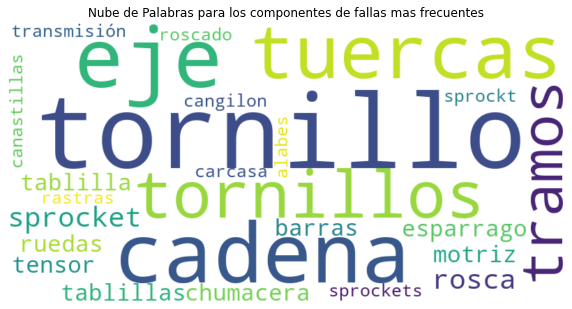

In [16]:
# Ahora generamos la nube de palabras

# Frecuencias generadas
frecuencias = {
    'cadena': 5, 'eje': 5, 'tuercas': 4, 'tornillos': 4, 'barras': 2,
    'tornillo': 8, 'tramos': 3, 'tablillas': 2, 'tablilla': 2, 'chumacera': 2,
    'esparrago': 2, 'cangilon': 1, 'sprocket': 3, 'motriz': 2,
    'tensor': 2, 'rosca': 3, 'rastras': 1, 'ruedas': 2,
    'alabes': 1, 'carcasa': 1, 'sprockt': 1, 'roscado': 1, 'sprockets': 1,
    'transmisión': 1, 'canastillas': 1
}

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencias)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para los componentes de fallas mas frecuentes')
plt.show()


In [17]:
# vamos a hacer un mapeo de palabras, para la situación, pero teniendo creando una lista con las palabras claves que corresponden al mismo grupo de componente
# teniendo en cuenta que nos agrupe 1 sola aparición si la palabra o el grupo de palabras se encuentran en varias partes del mismo reporte
# Listado de palabras agrupadas
grupos_palabras = {
    'tornillo': ['tornillo', 'tornillos','esparrago','rosca'],
    'tablilla': ['tablilla', 'tablillas'],
    'sprocket': ['sprocket', 'sprockt', 'sprockets'],
    'cadena': ['cadena','cadenas','tramos'],
    'eje': ['eje'],
    'tuercas': ['tuercas'],
    'barras': ['barras'],
    'chumacera': ['chumacera'],
    'canastillas': ['canastillas'],
}

# Iterar sobre cada grupo de palabras
for grupo, palabras in grupos_palabras.items():
    # Crear una expresión regular que combine todas las palabras del grupo
    regex = '|'.join([f'\\b{palabra}\\b' for palabra in palabras])

    # Filtrar filas donde la columna 'Situacion' contiene alguna de las palabras del grupo (case-insensitive)
    df_filtrado = df_reclamo[df_reclamo['Situacion'].str.contains(regex, case=False, na=False)]

    # Contar cuántos ID únicos hay en las filas filtradas
    num_id = df_filtrado['ID'].nunique()

    # Imprimir el resultado
    print(f"Número de ID únicos que contienen palabras del grupo '{grupo}': {num_id}")


Número de ID únicos que contienen palabras del grupo 'tornillo': 10
Número de ID únicos que contienen palabras del grupo 'tablilla': 2
Número de ID únicos que contienen palabras del grupo 'sprocket': 3
Número de ID únicos que contienen palabras del grupo 'cadena': 7
Número de ID únicos que contienen palabras del grupo 'eje': 5
Número de ID únicos que contienen palabras del grupo 'tuercas': 4
Número de ID únicos que contienen palabras del grupo 'barras': 2
Número de ID únicos que contienen palabras del grupo 'chumacera': 2
Número de ID únicos que contienen palabras del grupo 'canastillas': 1


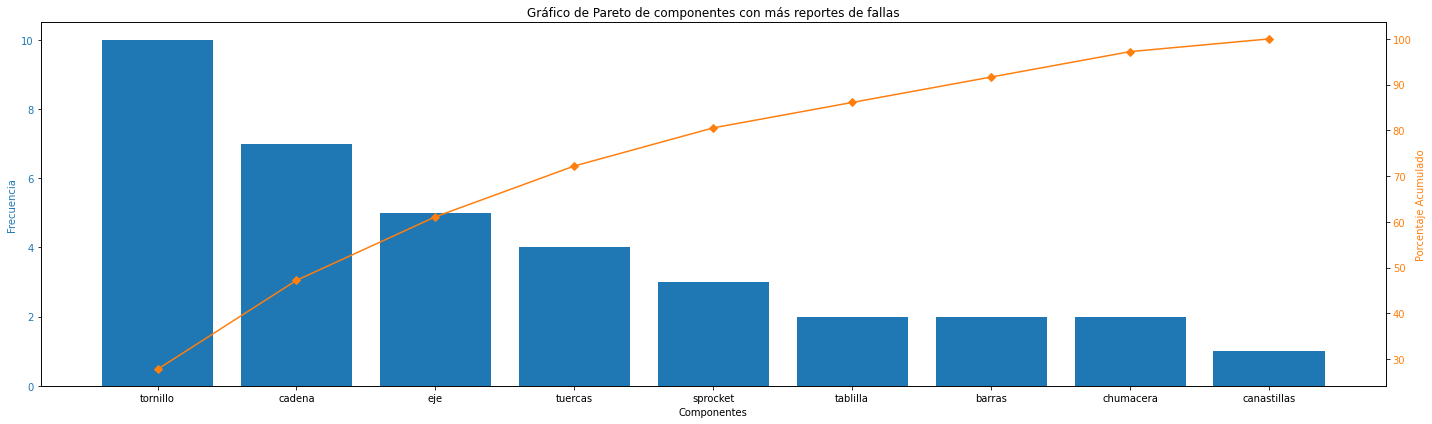

In [18]:
# Ggrafico de pareto corregido
# frecuencias por agrupamiento
frecuencias = {
    'tornillo': 10,
    'tablilla': 2,
    'sprocket': 3,
  'cadena': 7,
    'eje': 5,
    'tuercas': 4,
    'barras': 2,
    'chumacera': 2,
    'canastillas': 1
}

# Crear un DataFrame a partir del diccionario de frecuencias
df_frecuencias = pd.DataFrame(list(frecuencias.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por la frecuencia en orden descendente
df_frecuencias = df_frecuencias.sort_values(by='Frecuencia', ascending=False)

# Calcular el porcentaje y el porcentaje acumulado
df_frecuencias['Porcentaje'] = 100 * df_frecuencias['Frecuencia'] / df_frecuencias['Frecuencia'].sum()
df_frecuencias['Porcentaje Acumulado'] = df_frecuencias['Porcentaje'].cumsum()

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(20, 6))

# Gráfico de barras para la frecuencia
ax1.bar(df_frecuencias['Palabra'], df_frecuencias['Frecuencia'], color='C0')
ax1.set_xlabel('Componentes')
ax1.set_ylabel('Frecuencia', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# Crear un segundo eje Y para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_frecuencias['Palabra'], df_frecuencias['Porcentaje Acumulado'], color='C1', marker='D', ms=5)
ax2.set_ylabel('Porcentaje Acumulado', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

# Ajustar las etiquetas del eje X para que sean verticales
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.title('Gráfico de Pareto de componentes con más reportes de fallas')
plt.tight_layout()
plt.show()


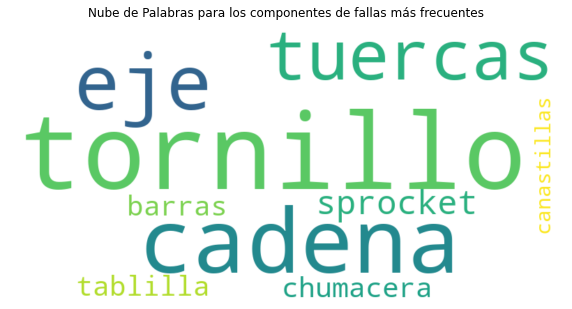

In [19]:
#Nube de palarbas corregida
# Frecuencias corregidas
frecuencias = {
    'tornillo': 10,
    'tablilla': 2,
    'sprocket': 3,
    'cadena': 7,
    'eje': 5,
    'tuercas': 4,
    'barras': 2,
    'chumacera': 2,
    'canastillas': 1
}

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencias)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para los componentes de fallas más frecuentes')
plt.show()
